<a href="https://colab.research.google.com/github/Juethro/Steam-topseller_analyzing/blob/main/Steam_Seller_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

KELOMPOK 8

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

pd.set_option('display.max_columns',None)

In [ ]:
url = "https://raw.githubusercontent.com/masten57/datascrapesteam/main/main_steam.csv"
df = pd.read_csv(url)
df.head()

,title,base_price,os_support,discount,release,genres,dlc,developer,publisher,features,total_review,storage,metacritic,sum_rating
0,Microsoft Flight Simulator 40th Anniversary Ed...,790000.0,win,-0%,"17 Aug, 2020",Simulation,no,Asobo Studio,Asobo Studio,"Single-player, Steam Achievements, Full contro...",45275,150.0,91.0,Very Positive
1,Darkest Dungeon® II,299999.0,win,-0%,"8 May, 2023","Indie, RPG, Strategy",no,Red Hook Studios,Red Hook Studios,"Single-player, Steam Achievements, Steam Tradi...",7413,NaN,82.0,Mostly Positive
2,Farlight 84,0.0,win,-0%,"23 Apr, 2023","Action, Adventure, Free to Play, Massively Mul...",no,Farlight Games,Farlight Games,"Online PvP, Online Co-op, Cross-Platform Multi...",5285,10.0,NaN,Very Positive
3,DARK SOULS™: REMASTERED,420000.0,win,-0%,"23 May, 2018",Action,no,QLOC,Bandai Namco Entertainment,"Single-player, Steam Achievements, Full contro...",50804,8.0,84.0,Very Positive
4,Sniper Elite 5,209999.0,win,-0%,"25 May, 2022","Action, Adventure",no,Rebellion,Rebellion,"Single-player, Online PvP, Online Co-op, Cross...",8402,85.0,79.0,Mostly Positive


# DATA UNDERSTANDING

### MISSING VALUES

In [ ]:
missing_values = df.isnull().sum()
print(missing_values)

title             0
base_price      275
os_support        0
discount          0
release           2
genres            5
dlc               0
developer         0
publisher         0
features          7
total_review      0
storage         408
metacritic      874
sum_rating        0
dtype: int64


### Remap Sum_rating

In [ ]:
df.sum_rating.unique()

array(['Very Positive', 'Mostly Positive', 'Overwhelmingly Positive',
       'Mixed', '5 user reviews', 'Positive', 'Mostly Negative',
       '9 user reviews', '4 user reviews', '6 user reviews',
       '2 user reviews', '8 user reviews'], dtype=object)

In [ ]:
df.sum_rating.value_counts()

Very Positive              734
Mostly Positive            196
Overwhelmingly Positive    177
Mixed                      161
Positive                    13
Mostly Negative              8
8 user reviews               3
9 user reviews               2
6 user reviews               2
2 user reviews               2
5 user reviews               1
4 user reviews               1
Name: sum_rating, dtype: int64

In [ ]:
# Melakukan pelabelan ulang
label_mapping = {
    'Very Positive': 'Very Positive',
    'Mostly Positive': 'Positive',
    'Overwhelmingly Positive': 'Very Positive',
    'Mixed': 'Neutral',
    'Positive': 'Positive',
    'Mostly Negative': 'Negative',
    '8 user reviews': 'Neutral',
    '9 user reviews': 'Neutral',
    '6 user reviews': 'Neutral',
    '2 user reviews': 'Neutral',
    '5 user reviews': 'Neutral',
    '4 user reviews': 'Neutral'
}
df['sum_rating'] = df['sum_rating'].map(label_mapping)

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Membuat objek LabelEncoder
encoder = LabelEncoder()

# Melakukan encoding pada kolom 'sum_rating'
df['sum_rating_encoded'] = encoder.fit_transform(df['sum_rating'])

# Hapus Metacritic, jelek soalnya
df = df.drop('sum_rating', axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   title               1300 non-null   object 
 1   base_price          1025 non-null   float64
 2   os_support          1300 non-null   object 
 3   discount            1300 non-null   object 
 4   release             1298 non-null   object 
 5   genres              1295 non-null   object 
 6   dlc                 1300 non-null   object 
 7   developer           1300 non-null   object 
 8   publisher           1300 non-null   object 
 9   features            1293 non-null   object 
 10  total_review        1300 non-null   int64  
 11  storage             892 non-null    float64
 12  metacritic          426 non-null    float64
 13  sum_rating_encoded  1300 non-null   int64  
dtypes: float64(3), int64(2), object(9)
memory usage: 142.3+ KB


In [ ]:
df.sum_rating_encoded.value_counts()

3    911
2    209
1    172
0      8
Name: sum_rating_encoded, dtype: int64

### Metacritic

In [ ]:
missing_percentage = df['metacritic'].isna().mean() * 100
print(f"Percentage of missing values in 'metacritic': {missing_percentage:.2f}%")

Percentage of missing values in 'metacritic': 67.23%


In [ ]:
# Hapus Metacritic, jelek soalnya
df = df.drop('metacritic', axis=1)
df

,title,base_price,os_support,discount,release,genres,dlc,developer,publisher,features,total_review,storage,sum_rating_encoded
0,Microsoft Flight Simulator 40th Anniversary Ed...,790000.0,win,-0%,"17 Aug, 2020",Simulation,no,Asobo Studio,Asobo Studio,"Single-player, Steam Achievements, Full contro...",45275,150.0,3
1,Darkest Dungeon® II,299999.0,win,-0%,"8 May, 2023","Indie, RPG, Strategy",no,Red Hook Studios,Red Hook Studios,"Single-player, Steam Achievements, Steam Tradi...",7413,NaN,2
2,Farlight 84,0.0,win,-0%,"23 Apr, 2023","Action, Adventure, Free to Play, Massively Mul...",no,Farlight Games,Farlight Games,"Online PvP, Online Co-op, Cross-Platform Multi...",5285,10.0,3
3,DARK SOULS™: REMASTERED,420000.0,win,-0%,"23 May, 2018",Action,no,QLOC,Bandai Namco Entertainment,"Single-player, Steam Achievements, Full contro...",50804,8.0,3
4,Sniper Elite 5,209999.0,win,-0%,"25 May, 2022","Action, Adventure",no,Rebellion,Rebellion,"Single-player, Online PvP, Online Co-op, Cross...",8402,85.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1295,Growing Up,130999.0,"win, mac",-0%,"13 Oct, 2021","Casual, Indie, RPG, Simulation, Strategy",no,Vile Monarch,Vile Monarch,"Single-player, Steam Achievements, Steam Cloud",2178,2.0,3
1296,ENDER LILIES: Quietus of the Knights,119999.0,win,-0%,"21 Jun, 2021","Action, Indie, RPG",no,"Live Wire, Adglobe",Adglobe,"Single-player, Steam Achievements, Full contro...",23306,2.0,3
1297,Creepy Tale 3: Ingrid Penance,NaN,"win, mac, linux",-30.0,"9 Mar, 2023","Adventure, Indie",no,Creepy Brothers,Creepy Brothers,"Single-player, Steam Achievements, Full contro...",192,7.0,3
1298,Placid Plastic Duck Simulator,17499.0,win,-0%,"6 Jul, 2022","Casual, Simulation",no,turbolento games,turbolento games,"Single-player, Online Co-op, Steam Achievement...",7348,0.5,3


### Developer

In [ ]:
developer_counts = df['developer'].value_counts()
print(developer_counts)

Valve                                                11
Jackbox Games, Inc.                                  10
KOEI TECMO GAMES CO., LTD.                           10
CAPCOM Co., Ltd.                                      8
Square Enix                                           8
                                                     ..
Fictiorama Studios, BadLand Games Publishing S.L.     1
Chromatic Games                                       1
Nornec                                                1
Forward Development, Ltd.                             1
Creepy Brothers                                       1
Name: developer, Length: 1047, dtype: int64


In [ ]:
# Hapus kolom 'developer' dari df
df = df.drop('developer', axis=1)

### Discount

In [ ]:
df.discount.head()

0    -0%
1    -0%
2    -0%
3    -0%
4    -0%
Name: discount, dtype: object

In [ ]:
# Menghilangkan simbol persen
df['discount'] = df['discount'].str.replace('%', '')

# Menghilangkan tanda negatif
df['discount'] = df['discount'].str.replace('-', '')

# Mengubah tipe data menjadi numerik
df['discount'] = pd.to_numeric(df['discount'])

# Menampilkan hasil
print(df['discount'])

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
1295     0.0
1296     0.0
1297    30.0
1298     0.0
1299    75.0
Name: discount, Length: 1300, dtype: float64


### DLC

In [ ]:
# Hapus kolom 'dlc' dari df
df = df.drop('dlc', axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   title               1300 non-null   object 
 1   base_price          1025 non-null   float64
 2   os_support          1300 non-null   object 
 3   discount            1300 non-null   float64
 4   release             1298 non-null   object 
 5   genres              1295 non-null   object 
 6   publisher           1300 non-null   object 
 7   features            1293 non-null   object 
 8   total_review        1300 non-null   int64  
 9   storage             892 non-null    float64
 10  sum_rating_encoded  1300 non-null   int64  
dtypes: float64(3), int64(2), object(6)
memory usage: 111.8+ KB


### Publisher

In [ ]:
# Hapus kolom 'developer' dari df
df = df.drop('publisher', axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   title               1300 non-null   object 
 1   base_price          1025 non-null   float64
 2   os_support          1300 non-null   object 
 3   discount            1300 non-null   float64
 4   release             1298 non-null   object 
 5   genres              1295 non-null   object 
 6   features            1293 non-null   object 
 7   total_review        1300 non-null   int64  
 8   storage             892 non-null    float64
 9   sum_rating_encoded  1300 non-null   int64  
dtypes: float64(3), int64(2), object(5)
memory usage: 101.7+ KB


### Total Review

In [ ]:
# Hapus kolom 'total review' dari df
df = df.drop('total_review', axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   title               1300 non-null   object 
 1   base_price          1025 non-null   float64
 2   os_support          1300 non-null   object 
 3   discount            1300 non-null   float64
 4   release             1298 non-null   object 
 5   genres              1295 non-null   object 
 6   features            1293 non-null   object 
 7   storage             892 non-null    float64
 8   sum_rating_encoded  1300 non-null   int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 91.5+ KB


### Features

In [ ]:
features_counts = df['features'].value_counts()
print(features_counts)

Single-player, Steam Achievements, Full controller support, Steam Cloud                                                                                                                                                    54
Single-player, Steam Achievements, Full controller support, Steam Trading Cards, Steam Cloud                                                                                                                               48
Single-player                                                                                                                                                                                                              46
Single-player, Steam Cloud                                                                                                                                                                                                 23
Single-player, Steam Achievements, Steam Cloud                                                                  

In [ ]:
# Count the missing values in the 'features' column
missing_values = df['features'].isnull().sum()

# Print the number of missing values
print("Number of missing values in 'features' column:", missing_values)

Number of missing values in 'features' column: 7


In [ ]:
# Import the necessary libraries
from sklearn.impute import SimpleImputer

# Create an instance of the SimpleImputer class with 'most_frequent' strategy
imputer = SimpleImputer(strategy='most_frequent')

# Impute the missing values in the 'features' column
df['features'] = imputer.fit_transform(df['features'].values.reshape(-1, 1))

# Check for missing values again
missing_values = df['features'].isnull().sum()
print("Number of missing values in 'features' column after imputation:", missing_values)

Number of missing values in 'features' column after imputation: 0


In [ ]:
# Count the number of games with online PvP feature
online_pvp_count = df['features'].str.contains('Online PvP').sum()

# Count the number of games with single player feature
single_player_count = df['features'].str.contains('Single-player').sum()

# Count the number of games with Cross-Platform Multiplayer
Cross_Platform_Multiplayer = df['features'].str.contains('Cross-Platform Multiplayer').sum()

# Hitung jumlah game dengan fitur full controller support
full_controller_count = df['features'].str.contains('Full controller support').sum()

# Hitung jumlah game dengan fitur partial controller support
partial_controller_count = df['features'].str.contains('Partial Controller Support').sum()

# Cetak jumlah game
print("Online PvP Count:", online_pvp_count)
print("Single Player Count:", single_player_count)
print("Cross-Platform Multiplayer:", Cross_Platform_Multiplayer)
print("Full Controller Support Count:", full_controller_count)
print("Partial Controller Support Count:", partial_controller_count)

Online PvP Count: 419
Single Player Count: 1117
Cross-Platform Multiplayer: 172
Full Controller Support Count: 535
Partial Controller Support Count: 260


In [ ]:
# Create a new DataFrame for the dummy variables
dummy_df = pd.DataFrame()

# Create dummy variables for each feature
dummy_df['Online PvP'] = df['features'].str.contains('Online PvP').map({True: 1, False: 0})
dummy_df['Single Player'] = df['features'].str.contains('Single-player').map({True: 1, False: 0})
dummy_df['Cross-Platform Multiplayer'] = df['features'].str.contains('Cross-Platform Multiplayer').map({True: 1, False: 0})
dummy_df['Full controller support'] = df['features'].str.contains('Full controller support').map({True: 1, False: 0})
dummy_df['Partial Controller Support'] = df['features'].str.contains('Partial Controller Support').map({True: 1, False: 0})

# Concatenate the dummy DataFrame with the original DataFrame
df = pd.concat([df, dummy_df], axis=1)

# Print the updated DataFrame
df.head()

,title,base_price,os_support,discount,release,genres,features,storage,sum_rating_encoded,Online PvP,Single Player,Cross-Platform Multiplayer,Full controller support,Partial Controller Support
0,Microsoft Flight Simulator 40th Anniversary Ed...,790000.0,win,0.0,"17 Aug, 2020",Simulation,"Single-player, Steam Achievements, Full contro...",150.0,3,0,1,0,1,0
1,Darkest Dungeon® II,299999.0,win,0.0,"8 May, 2023","Indie, RPG, Strategy","Single-player, Steam Achievements, Steam Tradi...",NaN,2,0,1,0,0,0
2,Farlight 84,0.0,win,0.0,"23 Apr, 2023","Action, Adventure, Free to Play, Massively Mul...","Online PvP, Online Co-op, Cross-Platform Multi...",10.0,3,1,0,1,0,1
3,DARK SOULS™: REMASTERED,420000.0,win,0.0,"23 May, 2018",Action,"Single-player, Steam Achievements, Full contro...",8.0,3,0,1,0,1,0
4,Sniper Elite 5,209999.0,win,0.0,"25 May, 2022","Action, Adventure","Single-player, Online PvP, Online Co-op, Cross...",85.0,2,1,1,1,1,0


In [ ]:
df['Full controller support'].value_counts()

0    765
1    535
Name: Full controller support, dtype: int64

In [ ]:
# Hapus kolom 'features' dari df
df = df.drop('features', axis=1)
df

,title,base_price,os_support,discount,release,genres,storage,sum_rating_encoded,Online PvP,Single Player,Cross-Platform Multiplayer,Full controller support,Partial Controller Support
0,Microsoft Flight Simulator 40th Anniversary Ed...,790000.0,win,0.0,"17 Aug, 2020",Simulation,150.0,3,0,1,0,1,0
1,Darkest Dungeon® II,299999.0,win,0.0,"8 May, 2023","Indie, RPG, Strategy",NaN,2,0,1,0,0,0
2,Farlight 84,0.0,win,0.0,"23 Apr, 2023","Action, Adventure, Free to Play, Massively Mul...",10.0,3,1,0,1,0,1
3,DARK SOULS™: REMASTERED,420000.0,win,0.0,"23 May, 2018",Action,8.0,3,0,1,0,1,0
4,Sniper Elite 5,209999.0,win,0.0,"25 May, 2022","Action, Adventure",85.0,2,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1295,Growing Up,130999.0,"win, mac",0.0,"13 Oct, 2021","Casual, Indie, RPG, Simulation, Strategy",2.0,3,0,1,0,0,0
1296,ENDER LILIES: Quietus of the Knights,119999.0,win,0.0,"21 Jun, 2021","Action, Indie, RPG",2.0,3,0,1,0,1,0
1297,Creepy Tale 3: Ingrid Penance,NaN,"win, mac, linux",30.0,"9 Mar, 2023","Adventure, Indie",7.0,3,0,1,0,1,0
1298,Placid Plastic Duck Simulator,17499.0,win,0.0,"6 Jul, 2022","Casual, Simulation",0.5,3,0,1,0,0,0


### Genre

In [ ]:
genres_counts = df['genres'].value_counts()
print(genres_counts)

Action                                                                           70
Action, Adventure                                                                57
Action, Indie                                                                    41
Action, Adventure, Indie                                                         37
Strategy                                                                         36
                                                                                 ..
Action, Casual, Free to Play, Massively Multiplayer, Sports                       1
Action, Indie, Simulation, Sports                                                 1
Casual, Free to Play, Massively Multiplayer, Simulation, Strategy                 1
Casual, Free to Play, Indie, Massively Multiplayer, RPG, Simulation, Strategy     1
Action, Racing, Sports                                                            1
Name: genres, Length: 344, dtype: int64


In [ ]:
# Membuat kolom-kolom dummy berdasarkan nama-nama dalam kolom 'developer'
dummies0 = df['genres'].str.get_dummies(sep=', ')

# Menggabungkan DataFrame asli dengan kolom-kolom dummy
df = pd.concat([df, dummies0], axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 34 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   title                       1300 non-null   object 
 1   base_price                  1025 non-null   float64
 2   os_support                  1300 non-null   object 
 3   discount                    1300 non-null   float64
 4   release                     1298 non-null   object 
 5   genres                      1295 non-null   object 
 6   storage                     892 non-null    float64
 7   sum_rating_encoded          1300 non-null   int64  
 8   Online PvP                  1300 non-null   int64  
 9   Single Player               1300 non-null   int64  
 10  Cross-Platform Multiplayer  1300 non-null   int64  
 11  Full controller support     1300 non-null   int64  
 12  Partial Controller Support  1300 non-null   int64  
 13  Action                      1300 

In [ ]:
# Hapus kolom 'genres' dari df
df = df.drop('genres', axis=1)
df

,title,base_price,os_support,discount,release,storage,sum_rating_encoded,Online PvP,Single Player,Cross-Platform Multiplayer,Full controller support,Partial Controller Support,Action,Adventure,Animation & Modeling,Audio Production,Casual,Design & Illustration,Early Access,Education,Free to Play,Game Development,Indie,Massively Multiplayer,Photo Editing,RPG,Racing,Simulation,Sports,Strategy,Utilities,Video Production,Web Publishing
0,Microsoft Flight Simulator 40th Anniversary Ed...,790000.0,win,0.0,"17 Aug, 2020",150.0,3,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,Darkest Dungeon® II,299999.0,win,0.0,"8 May, 2023",NaN,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0
2,Farlight 84,0.0,win,0.0,"23 Apr, 2023",10.0,3,1,0,1,0,1,1,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0
3,DARK SOULS™: REMASTERED,420000.0,win,0.0,"23 May, 2018",8.0,3,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Sniper Elite 5,209999.0,win,0.0,"25 May, 2022",85.0,2,1,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1295,Growing Up,130999.0,"win, mac",0.0,"13 Oct, 2021",2.0,3,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0
1296,ENDER LILIES: Quietus of the Knights,119999.0,win,0.0,"21 Jun, 2021",2.0,3,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0
1297,Creepy Tale 3: Ingrid Penance,NaN,"win, mac, linux",30.0,"9 Mar, 2023",7.0,3,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1298,Placid Plastic Duck Simulator,17499.0,win,0.0,"6 Jul, 2022",0.5,3,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


### OS Support

In [ ]:
os_counts = df['os_support'].value_counts()
print(os_counts)

win                863
win, mac, linux    234
win, mac           177
win, linux          26
Name: os_support, dtype: int64


In [ ]:
df['win'] = df['os_support'].apply(lambda x: 1 if 'win' in x else 0)
df['mac'] = df['os_support'].apply(lambda x: 1 if 'mac' in x else 0)
df['linux'] = df['os_support'].apply(lambda x: 1 if 'linux' in x else 0)

In [ ]:
df.head()

,title,base_price,os_support,discount,release,storage,sum_rating_encoded,Online PvP,Single Player,Cross-Platform Multiplayer,Full controller support,Partial Controller Support,Action,Adventure,Animation & Modeling,Audio Production,Casual,Design & Illustration,Early Access,Education,Free to Play,Game Development,Indie,Massively Multiplayer,Photo Editing,RPG,Racing,Simulation,Sports,Strategy,Utilities,Video Production,Web Publishing,win,mac,linux
0,Microsoft Flight Simulator 40th Anniversary Ed...,790000.0,win,0.0,"17 Aug, 2020",150.0,3,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
1,Darkest Dungeon® II,299999.0,win,0.0,"8 May, 2023",NaN,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0
2,Farlight 84,0.0,win,0.0,"23 Apr, 2023",10.0,3,1,0,1,0,1,1,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
3,DARK SOULS™: REMASTERED,420000.0,win,0.0,"23 May, 2018",8.0,3,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,Sniper Elite 5,209999.0,win,0.0,"25 May, 2022",85.0,2,1,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [ ]:
# Hapus kolom 'os_support' dari df
df = df.drop('os_support', axis=1)
df

,title,base_price,discount,release,storage,sum_rating_encoded,Online PvP,Single Player,Cross-Platform Multiplayer,Full controller support,Partial Controller Support,Action,Adventure,Animation & Modeling,Audio Production,Casual,Design & Illustration,Early Access,Education,Free to Play,Game Development,Indie,Massively Multiplayer,Photo Editing,RPG,Racing,Simulation,Sports,Strategy,Utilities,Video Production,Web Publishing,win,mac,linux
0,Microsoft Flight Simulator 40th Anniversary Ed...,790000.0,0.0,"17 Aug, 2020",150.0,3,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
1,Darkest Dungeon® II,299999.0,0.0,"8 May, 2023",NaN,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0
2,Farlight 84,0.0,0.0,"23 Apr, 2023",10.0,3,1,0,1,0,1,1,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
3,DARK SOULS™: REMASTERED,420000.0,0.0,"23 May, 2018",8.0,3,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,Sniper Elite 5,209999.0,0.0,"25 May, 2022",85.0,2,1,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1295,Growing Up,130999.0,0.0,"13 Oct, 2021",2.0,3,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,1,1,0
1296,ENDER LILIES: Quietus of the Knights,119999.0,0.0,"21 Jun, 2021",2.0,3,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0
1297,Creepy Tale 3: Ingrid Penance,NaN,30.0,"9 Mar, 2023",7.0,3,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,1
1298,Placid Plastic Duck Simulator,17499.0,0.0,"6 Jul, 2022",0.5,3,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0


### Title

In [ ]:
# Delete Title
df = df.drop('title', axis = 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 34 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   base_price                  1025 non-null   float64
 1   discount                    1300 non-null   float64
 2   release                     1298 non-null   object 
 3   storage                     892 non-null    float64
 4   sum_rating_encoded          1300 non-null   int64  
 5   Online PvP                  1300 non-null   int64  
 6   Single Player               1300 non-null   int64  
 7   Cross-Platform Multiplayer  1300 non-null   int64  
 8   Full controller support     1300 non-null   int64  
 9   Partial Controller Support  1300 non-null   int64  
 10  Action                      1300 non-null   int64  
 11  Adventure                   1300 non-null   int64  
 12  Animation & Modeling        1300 non-null   int64  
 13  Audio Production            1300 

### Release Date

In [ ]:
df = df.dropna(subset=['release'])

In [ ]:
# Mengubah kolom 'release_date' menjadi tipe data datetime
df['release'] = pd.to_datetime(df['release'])

# Mendapatkan informasi quartal dan tahun
df['quartal'] = df['release'].dt.quarter
df['year'] = df['release'].dt.year

# Mengubah tipe data kolom 'quartal' dan 'tahun' menjadi integer
df['quartal'] = df['quartal'].astype(int)
df['year'] = df['year'].astype(int)

# Menampilkan hasil
print(df[['quartal', 'year']])

      quartal  year
0           3  2020
1           2  2023
2           2  2023
3           2  2018
4           2  2022
...       ...   ...
1295        4  2021
1296        2  2021
1297        1  2023
1298        3  2022
1299        1  2016

[1298 rows x 2 columns]


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1298 entries, 0 to 1299
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   base_price                  1024 non-null   float64       
 1   discount                    1298 non-null   float64       
 2   release                     1298 non-null   datetime64[ns]
 3   storage                     892 non-null    float64       
 4   sum_rating_encoded          1298 non-null   int64         
 5   Online PvP                  1298 non-null   int64         
 6   Single Player               1298 non-null   int64         
 7   Cross-Platform Multiplayer  1298 non-null   int64         
 8   Full controller support     1298 non-null   int64         
 9   Partial Controller Support  1298 non-null   int64         
 10  Action                      1298 non-null   int64         
 11  Adventure                   1298 non-null   int64       

In [ ]:
# Hapus kolom 'release' dari df
df = df.drop('release', axis=1)

### Drop Kolom Bukan Game

In [ ]:
df.Utilities.unique()

array([0, 1])

In [ ]:
df = df.drop(df[df["Web Publishing"] == 1].index)
df = df.drop(df[df["Utilities"] == 1].index)
df = df.drop(df[df["Video Production"] == 1].index)
df = df.drop(df[df["Photo Editing"] == 1].index)
df = df.drop(df[df["Design & Illustration"] == 1].index)
df = df.drop(df[df["Audio Production"] == 1].index)
df = df.drop(df[df["Animation & Modeling"] == 1].index)
df = df.drop(df[df["Game Development"] == 1].index)

In [ ]:
# Checking
df["Animation & Modeling"].unique()

array([0])

In [ ]:
# Drop kolom bukan game
df = df.drop(['Web Publishing', 'Utilities', 'Video Production',
              'Photo Editing', 'Design & Illustration', 'Audio Production',
              'Animation & Modeling', 'Game Development','Education'], axis=1)

In [ ]:
# reset index df
df.reset_index(drop=True, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1281 entries, 0 to 1280
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   base_price                  1008 non-null   float64
 1   discount                    1281 non-null   float64
 2   storage                     882 non-null    float64
 3   sum_rating_encoded          1281 non-null   int64  
 4   Online PvP                  1281 non-null   int64  
 5   Single Player               1281 non-null   int64  
 6   Cross-Platform Multiplayer  1281 non-null   int64  
 7   Full controller support     1281 non-null   int64  
 8   Partial Controller Support  1281 non-null   int64  
 9   Action                      1281 non-null   int64  
 10  Adventure                   1281 non-null   int64  
 11  Casual                      1281 non-null   int64  
 12  Early Access                1281 non-null   int64  
 13  Free to Play                1281 

# PREPROCESSING

## Split Data Prepo

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Memisahkan fitur dan target dari DataFrame
X = df.drop('sum_rating_encoded', axis=1)  # Mengganti 'target' dengan nama kolom target yang sesuai
y = df['sum_rating_encoded']  # Mengganti 'target' dengan nama kolom target yang sesuai

# Melakukan split data menjadi train set dan test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 896 entries, 871 to 69
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   base_price                  711 non-null    float64
 1   discount                    896 non-null    float64
 2   storage                     613 non-null    float64
 3   Online PvP                  896 non-null    int64  
 4   Single Player               896 non-null    int64  
 5   Cross-Platform Multiplayer  896 non-null    int64  
 6   Full controller support     896 non-null    int64  
 7   Partial Controller Support  896 non-null    int64  
 8   Action                      896 non-null    int64  
 9   Adventure                   896 non-null    int64  
 10  Casual                      896 non-null    int64  
 11  Early Access                896 non-null    int64  
 12  Free to Play                896 non-null    int64  
 13  Indie                       896 no

In [ ]:
y_train.value_counts()

3    627
2    144
1    120
0      5
Name: sum_rating_encoded, dtype: int64

## Analisis Missing Values

### Combined X_train + y_train

In [ ]:
# Menggabungkan X_train dan y_train
comb = pd.concat([X_train, y_train], axis=1)

### Combined X_test + y_test

In [ ]:
# Menggabungkan X_train dan y_train
comb_test = pd.concat([X_test, y_test], axis=1)

### Missing Values

In [ ]:
# comb_train check
missing = comb.isna().sum()
print(missing)

base_price                    185
discount                        0
storage                       283
Online PvP                      0
Single Player                   0
Cross-Platform Multiplayer      0
Full controller support         0
Partial Controller Support      0
Action                          0
Adventure                       0
Casual                          0
Early Access                    0
Free to Play                    0
Indie                           0
Massively Multiplayer           0
RPG                             0
Racing                          0
Simulation                      0
Sports                          0
Strategy                        0
win                             0
mac                             0
linux                           0
quartal                         0
year                            0
sum_rating_encoded              0
dtype: int64


In [ ]:
# comb_test check
missing = comb_test.isna().sum()
print(missing)

base_price                     88
discount                        0
storage                       116
Online PvP                      0
Single Player                   0
Cross-Platform Multiplayer      0
Full controller support         0
Partial Controller Support      0
Action                          0
Adventure                       0
Casual                          0
Early Access                    0
Free to Play                    0
Indie                           0
Massively Multiplayer           0
RPG                             0
Racing                          0
Simulation                      0
Sports                          0
Strategy                        0
win                             0
mac                             0
linux                           0
quartal                         0
year                            0
sum_rating_encoded              0
dtype: int64


### Storage

In [ ]:
# Menghitung mean berdasarkan data train
median_by_group_train = comb.groupby('sum_rating_encoded')['storage'].median()
comb['storage'] = comb.groupby('sum_rating_encoded')['storage'].transform(lambda x: x.fillna(median_by_group_train[x.name]))

# Mengisi missing value pada data tes menggunakan mean dari data train
comb_test['storage'] = comb_test.groupby('sum_rating_encoded')['storage'].transform(lambda x: x.fillna(median_by_group_train[x.name]))


In [ ]:
# # Hitung mean sebelum imputasi
# mean_before = comb.groupby('sum_rating_encoded')['storage'].mean()
# print("Mean sebelum imputasi:")
# print(mean_before)

# # Lakukan imputasi menggunakan median
# storage_median = comb.groupby('sum_rating_encoded')['storage'].median()

# for index, row in comb.iterrows():
#     if pd.isnull(row['storage']):
#         comb.loc[index, 'storage'] = storage_median[row['sum_rating_encoded']]

# # Hitung mean setelah imputasi
# mean_after = comb.groupby('sum_rating_encoded')['storage'].mean()
# print("Mean setelah imputasi:")
# print(mean_after)

In [ ]:
# # Mengembalikan nilai awal dari kolom 'sum_rating_encoded' menggunakan inverse_transform
# comb['sum_rating'] = encoder.inverse_transform(comb['sum_rating_encoded'])

# # Menampilkan nilai unik dan jumlah setiap nilai pada kolom 'sum_rating'
# print(comb['sum_rating'].value_counts())

In [ ]:
# # Membalikkan transformasi label menjadi nilai asli
# labels = encoder.inverse_transform([0, 1, 2, 3])

# # Menampilkan hasil
# for i, label in enumerate(labels):
#     print(f"Label {i}: {label}")

In [ ]:
comb.storage.isna().sum()

0

In [ ]:
comb_test.storage.isna().sum()

0

### Base Price

In [ ]:
# Menghitung mean berdasarkan data train
mean_by_group_train = comb.groupby('sum_rating_encoded')['base_price'].mean()
comb['base_price'] = comb.groupby('sum_rating_encoded')['base_price'].transform(lambda x: x.fillna(mean_by_group_train[x.name]))

# Mengisi missing value pada data tes menggunakan mean dari data train
comb_test['base_price'] = comb_test.groupby('sum_rating_encoded')['base_price'].transform(lambda x: x.fillna(mean_by_group_train[x.name]))


In [ ]:
comb.base_price.isna().sum()

0

In [ ]:
comb_test.base_price.isna().sum()

0

## Analisis Outlier

### Storage

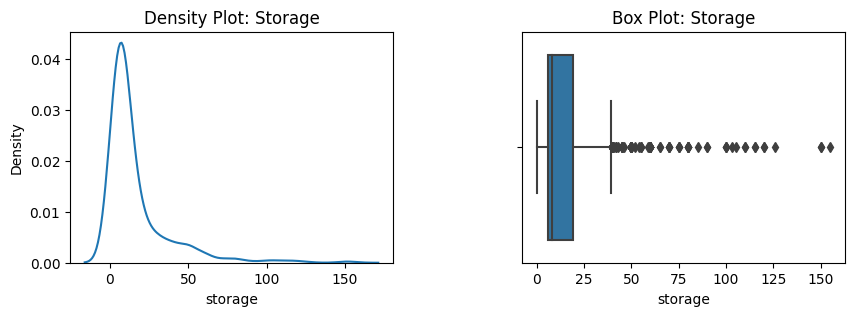

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Membuat figure dan axes
fig, axes = plt.subplots(1, 2, figsize=(10, 3))

# Density plot
sns.kdeplot(data=comb['storage'], ax=axes[0])
axes[0].set_xlabel('storage')
axes[0].set_ylabel('Density')
axes[0].set_title('Density Plot: Storage')

# Box plot
sns.boxplot(x=comb['storage'], ax=axes[1])
axes[1].set_xlabel('storage')
axes[1].set_title('Box Plot: Storage')

# Mengatur jarak antara subplot
plt.subplots_adjust(wspace=0.4)

# Menampilkan density plot dan box plot
plt.show()

In [ ]:
# # Menghitung batas atas dan batas bawah dari box plot
# Q1 = comb['storage'].quantile(0.25)
# Q3 = comb['storage'].quantile(0.75)
# IQR = Q3 - Q1
# lower_bound = Q1 - 1.5 * IQR
# upper_bound = Q3 + 1.5 * IQR

# # Menghapus outlier berdasarkan box plot
# comb = comb[(comb['storage'] >= lower_bound) & (comb['storage'] <= upper_bound)]

In [ ]:
# # Membuat figure dan axes
# fig, axes = plt.subplots(1, 2, figsize=(10, 3))

# # Density plot
# sns.kdeplot(data=comb['storage'], ax=axes[0])
# axes[0].set_xlabel('storage')
# axes[0].set_ylabel('Density')
# axes[0].set_title('Density Plot: Storage')

# # Box plot
# sns.boxplot(x=comb['storage'], ax=axes[1])
# axes[1].set_xlabel('storage')
# axes[1].set_title('Box Plot: Storage')

# # Mengatur jarak antara subplot
# plt.subplots_adjust(wspace=0.4)

# # Menampilkan density plot dan box plot
# plt.show()

### Base Price

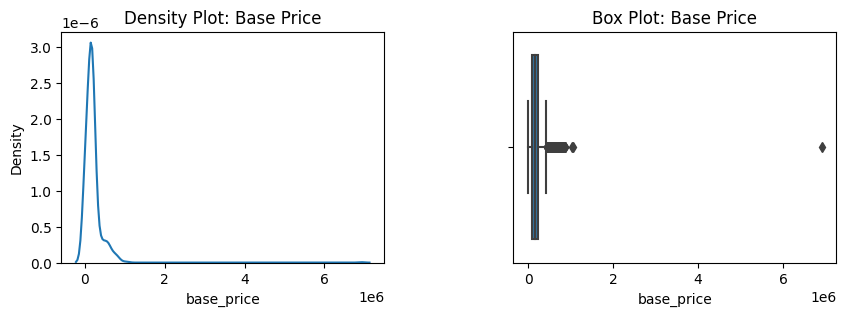

In [ ]:
# Membuat figure dan axes
fig, axes = plt.subplots(1, 2, figsize=(10, 3))

# Density plot
sns.kdeplot(data=comb['base_price'], ax=axes[0])
axes[0].set_xlabel('base_price')
axes[0].set_ylabel('Density')
axes[0].set_title('Density Plot: Base Price')

# Box plot
sns.boxplot(x=comb['base_price'], ax=axes[1])
axes[1].set_xlabel('base_price')
axes[1].set_title('Box Plot: Base Price')

# Mengatur jarak antara subplot
plt.subplots_adjust(wspace=0.4)

# Menampilkan density plot dan box plot
plt.show()

### Discount

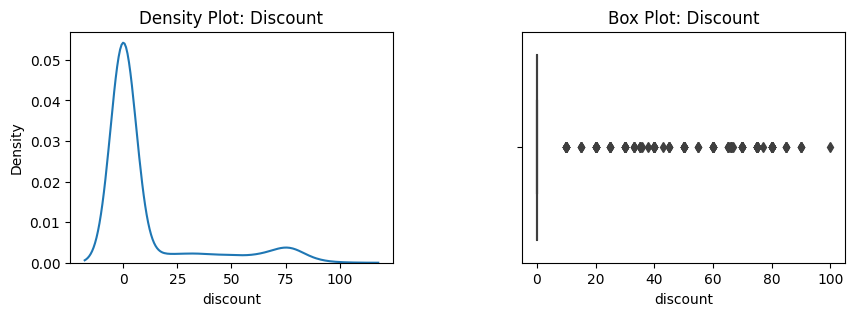

In [ ]:
# Membuat figure dan axes
fig, axes = plt.subplots(1, 2, figsize=(10, 3))

# Density plot
sns.kdeplot(data=comb['discount'], ax=axes[0])
axes[0].set_xlabel('discount')
axes[0].set_ylabel('Density')
axes[0].set_title('Density Plot: Discount')

# Box plot
sns.boxplot(x=comb['discount'], ax=axes[1])
axes[1].set_xlabel('discount')
axes[1].set_title('Box Plot: Discount')

# Mengatur jarak antara subplot
plt.subplots_adjust(wspace=0.4)

# Menampilkan density plot dan box plot
plt.show()

## Transformasi

### Scaler Only

In [ ]:
# from sklearn.preprocessing import RobustScaler

# numm = ['storage', 'base_price', 'discount']
# scaler_num = RobustScaler()
# comb[numm] = scaler_num.fit_transform(comb[numm])

# # Scaling
# comb[numm] = scaler_num.transform(comb[numm])
# comb_test[numm] = scaler_num.transform(comb_test[numm])

### Robust Scaler & Log-transform

In [ ]:
# from sklearn.preprocessing import RobustScaler

# numm = ['storage', 'base_price', 'discount']
# scaler_num = RobustScaler()
# comb[numm] = scaler_num.fit_transform(comb[numm])

# # Scaling
# comb[numm] = scaler_num.transform(comb[numm])
# comb_test[numm] = scaler_num.transform(comb_test[numm])

# # Log transform
# comb[numm[0]] = np.log(comb[numm[0]])
# comb[numm[1]] = np.log(comb[numm[1]])
# comb[numm[2]] = np.log(comb[numm[2]])

In [ ]:
# comb

### Robust Scaler & Power Transform

In [ ]:
# from sklearn.preprocessing import RobustScaler
# from sklearn.preprocessing import PowerTransformer

# numm = ['storage', 'base_price', 'discount']
# # scaling pada data numerik
# scaler_num = RobustScaler()
# # scaler = MinMaxScaler()
# comb[numm] = scaler_num.fit_transform(comb[numm])
# scaler_power = PowerTransformer()
# comb[numm] = scaler_power.fit_transform(comb[numm])

In [ ]:
# # apply the same scaler to test using train_sample as the fit
# comb[numm] = scaler_num.transform(comb[numm])
# comb_test[numm] = scaler_num.transform(comb_test[numm])


# comb[numm] = scaler_power.transform(comb[numm])
# comb_test[numm] = scaler_power.transform(comb_test[numm])

### Check storage

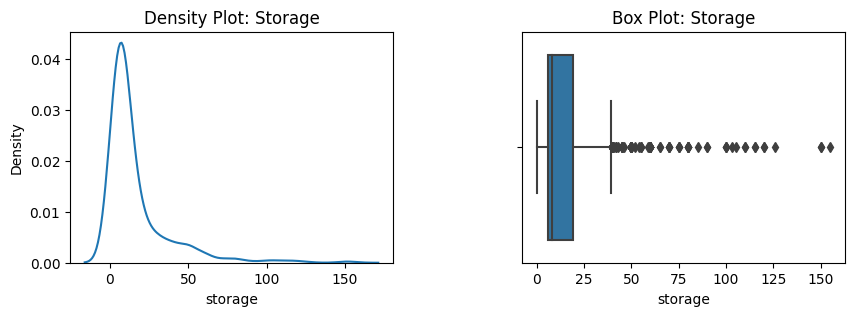

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10, 3))

# Density plot
sns.kdeplot(data=comb['storage'], ax=axes[0])
axes[0].set_xlabel('storage')
axes[0].set_ylabel('Density')
axes[0].set_title('Density Plot: Storage')

# Box plot
sns.boxplot(x=comb['storage'], ax=axes[1])
axes[1].set_xlabel('storage')
axes[1].set_title('Box Plot: Storage')

# Mengatur jarak antara subplot
plt.subplots_adjust(wspace=0.4)

# Menampilkan density plot dan box plot
plt.show()

### Check base price

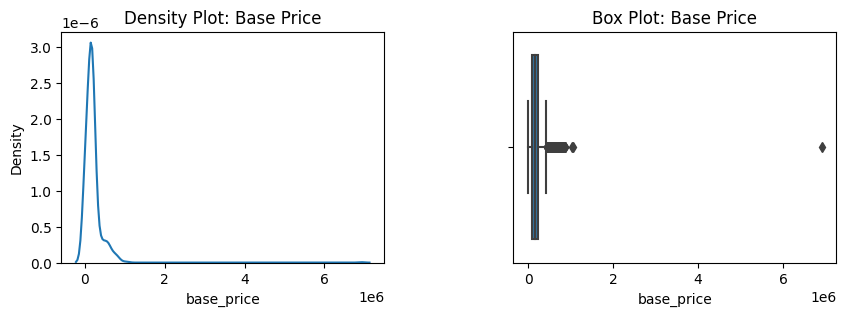

In [ ]:
# Membuat figure dan axes
fig, axes = plt.subplots(1, 2, figsize=(10, 3))

# Density plot
sns.kdeplot(data=comb['base_price'], ax=axes[0])
axes[0].set_xlabel('base_price')
axes[0].set_ylabel('Density')
axes[0].set_title('Density Plot: Base Price')

# Box plot
sns.boxplot(x=comb['base_price'], ax=axes[1])
axes[1].set_xlabel('base_price')
axes[1].set_title('Box Plot: Base Price')

# Mengatur jarak antara subplot
plt.subplots_adjust(wspace=0.4)

# Menampilkan density plot dan box plot
plt.show()

### Check discount

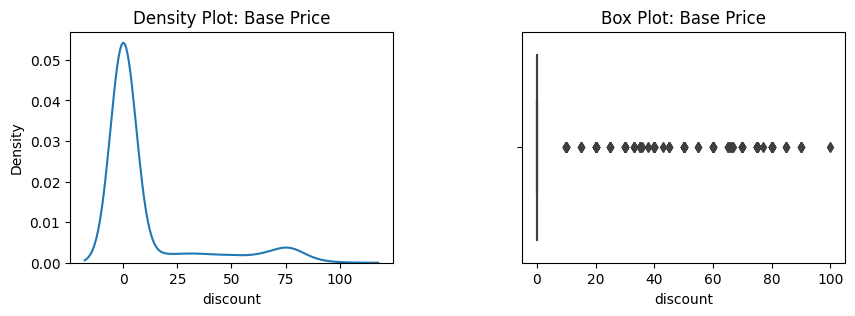

In [ ]:
# Membuat figure dan axes
fig, axes = plt.subplots(1, 2, figsize=(10, 3))

# Density plot
sns.kdeplot(data=comb['discount'], ax=axes[0])
axes[0].set_xlabel('discount')
axes[0].set_ylabel('Density')
axes[0].set_title('Density Plot: Base Price')

# Box plot
sns.boxplot(x=comb['discount'], ax=axes[1])
axes[1].set_xlabel('discount')
axes[1].set_title('Box Plot: Base Price')

# Mengatur jarak antara subplot
plt.subplots_adjust(wspace=0.4)

# Menampilkan density plot dan box plot
plt.show()

## Combine Data Model

In [ ]:
# Gabungkan dengan df
df_preposed = pd.concat([comb, comb_test], axis=0, ignore_index=True)



## Bootstrap

In [ ]:
def bootstrap(data, target_col, n_iterations):
    bootstrap_samples = []

    # Bootstrap untuk label 0 dengan n_iterations 10
    target_values = [0]
    for target_value in target_values:
      target_data = data[data[target_col] == target_value]
      for _ in range(n_iterations):
          bootstrap_sample = target_data.sample(n=len(target_data), replace=True)
          bootstrap_samples.append(bootstrap_sample)

    # Bootstrap untuk label 1, 2, 3 dengan n_iterations 5
    # target_values = []
    # for target_value in target_values:
    #     target_data = data[data[target_col] == target_value]
    #     for _ in range(5):
    #         bootstrap_sample = target_data.sample(n=len(target_data), replace=True)
    #         bootstrap_samples.append(bootstrap_sample)

    return bootstrap_samples

# Contoh penggunaan
target_col = 'sum_rating_encoded'
n_iterations = 20

bootstrap_samples = bootstrap(df_preposed, target_col, n_iterations)

# Menggabungkan semua sampel bootstrap ke dalam satu DataFrame
bootstrap_df = pd.concat(bootstrap_samples, ignore_index=True)

# Gabungkan dengan df
df_preposed = pd.concat([df_preposed, bootstrap_df], axis=0, ignore_index=True)

# Menampilkan DataFrame hasil bootstrap
bootstrap_df

,base_price,discount,storage,Online PvP,Single Player,Cross-Platform Multiplayer,Full controller support,Partial Controller Support,Action,Adventure,Casual,Early Access,Free to Play,Indie,Massively Multiplayer,RPG,Racing,Simulation,Sports,Strategy,win,mac,linux,quartal,year,sum_rating_encoded
0,0.0,0.0,95.0,1,1,1,1,0,1,0,0,0,1,0,1,0,0,1,0,0,1,1,1,3,2013,0
1,0.0,0.0,60.0,1,1,0,0,0,0,0,1,0,1,1,0,0,0,0,0,1,1,0,0,2,2020,0
2,0.0,10.0,10.0,0,1,0,0,0,1,1,0,1,0,1,0,0,0,0,0,0,1,0,0,2,2023,0
3,0.0,0.0,60.0,1,1,0,0,0,0,0,1,0,1,1,0,0,0,0,0,1,1,0,0,2,2020,0
4,0.0,0.0,95.0,1,1,1,1,0,1,0,0,0,1,0,1,0,0,1,0,0,1,1,1,3,2013,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,0.0,10.0,2.0,1,1,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,1,0,0,2,2023,0
156,0.0,0.0,60.0,1,1,0,0,0,0,0,1,0,1,1,0,0,0,0,0,1,1,0,0,2,2020,0
157,0.0,0.0,80.0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,4,2022,0
158,0.0,0.0,35.0,1,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,1,0,0,2,2023,0


In [ ]:
def bootstrap1(data, target_col, n_iterations):
    bootstrap_samples = []

    # Bootstrap untuk label 0 dengan n_iterations 10
    target_values = [1]
    for target_value in target_values:
      target_data = data[data[target_col] == target_value]
      for _ in range(n_iterations):
          bootstrap_sample = target_data.sample(n=len(target_data), replace=True)
          bootstrap_samples.append(bootstrap_sample)

    # Bootstrap untuk label 1, 2, 3 dengan n_iterations 5
    # target_values = []
    # for target_value in target_values:
    #     target_data = data[data[target_col] == target_value]
    #     for _ in range(5):
    #         bootstrap_sample = target_data.sample(n=len(target_data), replace=True)
    #         bootstrap_samples.append(bootstrap_sample)

    return bootstrap_samples

# Contoh penggunaan
target_col = 'sum_rating_encoded'
n_iterations = 20

bootstrap_samples = bootstrap1(df_preposed, target_col, n_iterations)

# Menggabungkan semua sampel bootstrap ke dalam satu DataFrame
bootstrap_df = pd.concat(bootstrap_samples, ignore_index=True)

# Gabungkan dengan df
df_preposed = pd.concat([df_preposed, bootstrap_df], axis=0, ignore_index=True)

# Menampilkan DataFrame hasil bootstrap
bootstrap_df

,base_price,discount,storage,Online PvP,Single Player,Cross-Platform Multiplayer,Full controller support,Partial Controller Support,Action,Adventure,Casual,Early Access,Free to Play,Indie,Massively Multiplayer,RPG,Racing,Simulation,Sports,Strategy,win,mac,linux,quartal,year,sum_rating_encoded
0,749000.000000,0.0,45.0,0,1,0,1,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,4,2022,1
1,231155.255319,40.0,1.0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,1,1,1,3,2021,1
2,0.000000,0.0,8.0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,2,2019,1
3,619000.000000,0.0,115.0,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,2023,1
4,0.000000,0.0,10.0,1,0,1,0,1,1,1,0,0,1,0,1,1,0,0,0,0,1,1,0,4,2022,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3415,229999.000000,0.0,15.0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,2022,1
3416,0.000000,0.0,30.0,1,0,0,1,0,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,2,2019,1
3417,0.000000,0.0,15.0,1,0,1,0,0,1,0,0,0,1,0,1,1,0,0,0,1,1,0,0,4,2022,1
3418,231155.255319,20.0,10.0,1,1,0,0,1,1,1,0,1,0,0,0,1,0,0,0,0,1,0,0,4,2022,1


In [ ]:
def bootstrap2(data, target_col, n_iterations):
    bootstrap_samples = []

    # Bootstrap untuk label 0 dengan n_iterations 10
    target_values = [2]
    for target_value in target_values:
      target_data = data[data[target_col] == target_value]
      for _ in range(n_iterations):
          bootstrap_sample = target_data.sample(n=len(target_data), replace=True)
          bootstrap_samples.append(bootstrap_sample)

    # Bootstrap untuk label 1, 2, 3 dengan n_iterations 5
    # target_values = []
    # for target_value in target_values:
    #     target_data = data[data[target_col] == target_value]
    #     for _ in range(5):
    #         bootstrap_sample = target_data.sample(n=len(target_data), replace=True)
    #         bootstrap_samples.append(bootstrap_sample)

    return bootstrap_samples

# Contoh penggunaan
target_col = 'sum_rating_encoded'
n_iterations = 20

bootstrap_samples = bootstrap2(df_preposed, target_col, n_iterations)

# Menggabungkan semua sampel bootstrap ke dalam satu DataFrame
bootstrap_df = pd.concat(bootstrap_samples, ignore_index=True)

# Gabungkan dengan df
df_preposed = pd.concat([df_preposed, bootstrap_df], axis=0, ignore_index=True)

# Menampilkan DataFrame hasil bootstrap
bootstrap_df

,base_price,discount,storage,Online PvP,Single Player,Cross-Platform Multiplayer,Full controller support,Partial Controller Support,Action,Adventure,Casual,Early Access,Free to Play,Indie,Massively Multiplayer,RPG,Racing,Simulation,Sports,Strategy,win,mac,linux,quartal,year,sum_rating_encoded
0,199000.000000,0.0,0.5,0,1,0,0,0,0,1,0,1,0,1,0,1,0,0,0,1,1,0,1,1,2020,2
1,205625.682243,70.0,15.0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,2021,2
2,206999.000000,0.0,15.0,0,1,0,0,1,0,1,0,1,0,1,0,1,0,0,0,1,1,1,0,2,2023,2
3,0.000000,0.0,15.0,1,1,1,0,0,0,0,0,1,1,0,0,0,0,1,1,0,1,1,0,2,2020,2
4,0.000000,0.0,40.0,1,0,0,0,0,1,1,0,0,1,0,1,1,0,0,0,0,1,0,0,3,2016,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4115,566000.000000,0.0,9.0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,3,2022,2
4116,209999.000000,0.0,85.0,1,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,2,2022,2
4117,108999.000000,0.0,6.0,0,1,0,1,0,1,1,0,1,0,1,0,0,0,1,0,0,1,0,1,1,2019,2
4118,165999.000000,0.0,5.0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,2,2023,2


In [ ]:
# def bootstrap(data, target_col, n_iterations):
#     bootstrap_samples = []

#     # Melakukan bootstrap untuk setiap nilai kelas target
#     target_values = data[target_col].unique()
#     for target_value in target_values:
#         target_data = data[data[target_col] == target_value]
#         for _ in range(n_iterations):
#             bootstrap_sample = target_data.sample(n=len(target_data), replace=True)
#             bootstrap_samples.append(bootstrap_sample)

#     return bootstrap_samples

# # Contoh penggunaan
# target_col = 'sum_rating_encoded'
# n_iterations = 5

# bootstrap_samples = bootstrap(comb, target_col, n_iterations)

# # Menggabungkan semua sampel bootstrap ke dalam satu DataFrame
# bootstrap_df = pd.concat(bootstrap_samples, ignore_index=True)

# # Gabungkan dengan df
# comb = pd.concat([comb, bootstrap_df], axis=0, ignore_index=True)

# # Menampilkan DataFrame hasil bootstrap
# bootstrap_df

In [ ]:
comb.tail()

,base_price,discount,storage,Online PvP,Single Player,Cross-Platform Multiplayer,Full controller support,Partial Controller Support,Action,Adventure,Casual,Early Access,Free to Play,Indie,Massively Multiplayer,RPG,Racing,Simulation,Sports,Strategy,win,mac,linux,quartal,year,sum_rating_encoded
320,56499.0,0.0,8.0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,1,0,4,2022,3
1141,550000.0,0.0,20.0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,4,2018,2
445,130999.0,0.0,7.0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,2,2023,1
859,149000.0,0.0,90.0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,2017,2
69,245999.0,0.0,8.0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,2023,3


### Split data

In [ ]:
X = df_preposed.drop('sum_rating_encoded', axis=1)  # Mengganti 'target' dengan nama kolom target yang sesuai
y = df_preposed['sum_rating_encoded']  # Mengganti 'target' dengan nama kolom target yang sesuai

# Melakukan split data menjadi train set dan test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
# Menggabungkan X_train dan y_train
comb = pd.concat([X_train, y_train], axis=1)
# Menggabungkan X_train dan y_train
comb_test = pd.concat([X_test, y_test], axis=1)

## Delete Duplicate

In [ ]:
comb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6286 entries, 5450 to 1947
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   base_price                  6286 non-null   float64
 1   discount                    6286 non-null   float64
 2   storage                     6286 non-null   float64
 3   Online PvP                  6286 non-null   int64  
 4   Single Player               6286 non-null   int64  
 5   Cross-Platform Multiplayer  6286 non-null   int64  
 6   Full controller support     6286 non-null   int64  
 7   Partial Controller Support  6286 non-null   int64  
 8   Action                      6286 non-null   int64  
 9   Adventure                   6286 non-null   int64  
 10  Casual                      6286 non-null   int64  
 11  Early Access                6286 non-null   int64  
 12  Free to Play                6286 non-null   int64  
 13  Indie                       62

In [ ]:
# Menghapus data duplikat
comb = comb.drop_duplicates()

# Menampilkan hasil setelah menghapus data duplikat
comb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 993 entries, 5450 to 605
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   base_price                  993 non-null    float64
 1   discount                    993 non-null    float64
 2   storage                     993 non-null    float64
 3   Online PvP                  993 non-null    int64  
 4   Single Player               993 non-null    int64  
 5   Cross-Platform Multiplayer  993 non-null    int64  
 6   Full controller support     993 non-null    int64  
 7   Partial Controller Support  993 non-null    int64  
 8   Action                      993 non-null    int64  
 9   Adventure                   993 non-null    int64  
 10  Casual                      993 non-null    int64  
 11  Early Access                993 non-null    int64  
 12  Free to Play                993 non-null    int64  
 13  Indie                       993 

In [ ]:
comb.sum_rating_encoded.value_counts()

3    616
2    201
1    168
0      8
Name: sum_rating_encoded, dtype: int64

## Split Comb

In [ ]:
comb_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2695 entries, 4269 to 4933
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   base_price                  2695 non-null   float64
 1   discount                    2695 non-null   float64
 2   storage                     2695 non-null   float64
 3   Online PvP                  2695 non-null   int64  
 4   Single Player               2695 non-null   int64  
 5   Cross-Platform Multiplayer  2695 non-null   int64  
 6   Full controller support     2695 non-null   int64  
 7   Partial Controller Support  2695 non-null   int64  
 8   Action                      2695 non-null   int64  
 9   Adventure                   2695 non-null   int64  
 10  Casual                      2695 non-null   int64  
 11  Early Access                2695 non-null   int64  
 12  Free to Play                2695 non-null   int64  
 13  Indie                       26

In [ ]:
# Memisahkan fitur dan target dari DataFrame
X_train = comb.drop('sum_rating_encoded', axis=1)  # Mengganti 'target' dengan nama kolom target yang sesuai
y_train = comb['sum_rating_encoded']  # Mengganti 'target' dengan nama kolom target yang sesuai

In [ ]:
# Memisahkan fitur dan target dari DataFrame
X_test = comb_test.drop('sum_rating_encoded', axis=1)  # Mengganti 'target' dengan nama kolom target yang sesuai
y_test = comb_test['sum_rating_encoded']  # Mengganti 'target' dengan nama kolom target yang sesuai

## Balancing

In [ ]:
y_train.value_counts()

3    616
2    201
1    168
0      8
Name: sum_rating_encoded, dtype: int64

### Tomek Links

In [ ]:
# from imblearn.under_sampling import TomekLinks

# # Inisialisasi metode Tomek Links
# tomek_links = TomekLinks(sampling_strategy='auto')

# # Melakukan resampling pada data train
# X_train_over, y_train_over = tomek_links.fit_resample(X_train, y_train)


In [ ]:
# y_train_over.value_counts()

### SMOTETomek

In [ ]:
from imblearn.combine import SMOTETomek

# Inisialisasi metode SMOTETomek
smote_tomek = SMOTETomek(sampling_strategy='auto', random_state = 42 )

# Melakukan resampling pada data train
X_train_over, y_train_over= smote_tomek.fit_resample(X_train, y_train)

In [ ]:
y_train_over.value_counts()

0    616
1    566
2    550
3    544
Name: sum_rating_encoded, dtype: int64

### RandomOversampling

In [ ]:
# from imblearn.over_sampling import RandomOverSampler

# # Inisialisasi Random Oversampler
# ros = RandomOverSampler(random_state=42)

# # Melakukan resampling pada data train
# X_train_over, y_train_over = ros.fit_resample(X_train, y_train)

# # Menampilkan distribusi kelas setelah resampling
# print("Distribusi kelas setelah resampling:")
# print(pd.Series(y_train_over).value_counts())

### SMOTE

In [ ]:
# # Inisialisasi SMOTE
# from imblearn.over_sampling import SMOTE
# smote = SMOTE(random_state=42)

# # Resampling pada train set
# X_train_over, y_train_over = smote.fit_resample(X_train, y_train)

In [ ]:
# y_train_over.value_counts()

### BorderLine

In [ ]:
# # Inisialisasi Borderland
# from imblearn.over_sampling import BorderlineSMOTE
# smote = BorderlineSMOTE(random_state=42)

# # Resampling pada train set
# X_train_over, y_train_over = smote.fit_resample(X_train, y_train)

In [ ]:
# y_train_over.value_counts()

### Adasyn

In [ ]:
# # Inisialisasi Borderland
# from imblearn.over_sampling import ADASYN
# smote = ADASYN(random_state=42)

# # Resampling pada train set
# X_train_over, y_train_over = smote.fit_resample(X_train, y_train)

In [ ]:
# y_train_over.value_counts()

# ARM

In [ ]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

# Menggunakan data genre-game yang telah dijadikan dummy
genre_data = df[['Action', 'Adventure', 'Casual', 'Early Access', 'Free to Play',
                   'Indie', 'Massively Multiplayer', 'RPG', 'Racing', 'Simulation', 'Sports', 'Strategy']]

# Menerapkan algoritma Apriori
frequent_itemsets = apriori(genre_data, min_support=0.1, use_colnames=True)

# Menerapkan aturan asosiasi
rules = association_rules(frequent_itemsets, metric='lift', min_threshold=1)

# Menampilkan hasil aturan asosiasi
print(rules)

            antecedents          consequents  antecedent support  \
0           (Adventure)             (Action)            0.387978   
1              (Action)          (Adventure)            0.500390   
2                 (RPG)             (Action)            0.274005   
3              (Action)                (RPG)            0.500390   
4           (Adventure)              (Indie)            0.387978   
5               (Indie)          (Adventure)            0.498048   
6           (Adventure)                (RPG)            0.387978   
7                 (RPG)          (Adventure)            0.274005   
8              (Casual)              (Indie)            0.197502   
9               (Indie)             (Casual)            0.498048   
10       (Early Access)              (Indie)            0.163154   
11              (Indie)       (Early Access)            0.498048   
12              (Indie)         (Simulation)            0.498048   
13         (Simulation)              (Indie)    

In [ ]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

# Menggunakan data genre-game yang telah dijadikan dummy
genre_data = comb[['Action', 'Adventure', 'Casual', 'Early Access', 'Free to Play',
                   'Indie', 'Massively Multiplayer', 'RPG', 'Racing', 'Simulation', 'Sports', 'Strategy']]

# Menerapkan algoritma Apriori
frequent_itemsets = apriori(genre_data, min_support=0.1, use_colnames=True)

# Menerapkan aturan asosiasi
rules = association_rules(frequent_itemsets, metric='lift', min_threshold=1)

# Menampilkan hasil aturan asosiasi
print(rules)

            antecedents          consequents  antecedent support  \
0           (Adventure)             (Action)            0.396777   
1              (Action)          (Adventure)            0.498489   
2                 (RPG)             (Action)            0.297080   
3              (Action)                (RPG)            0.498489   
4           (Adventure)              (Indie)            0.396777   
5               (Indie)          (Adventure)            0.484391   
6           (Adventure)                (RPG)            0.396777   
7                 (RPG)          (Adventure)            0.297080   
8              (Casual)              (Indie)            0.192346   
9               (Indie)             (Casual)            0.484391   
10       (Early Access)              (Indie)            0.165156   
11              (Indie)       (Early Access)            0.484391   
12              (Indie)         (Simulation)            0.484391   
13         (Simulation)              (Indie)    

# EDA

## HEATMAP

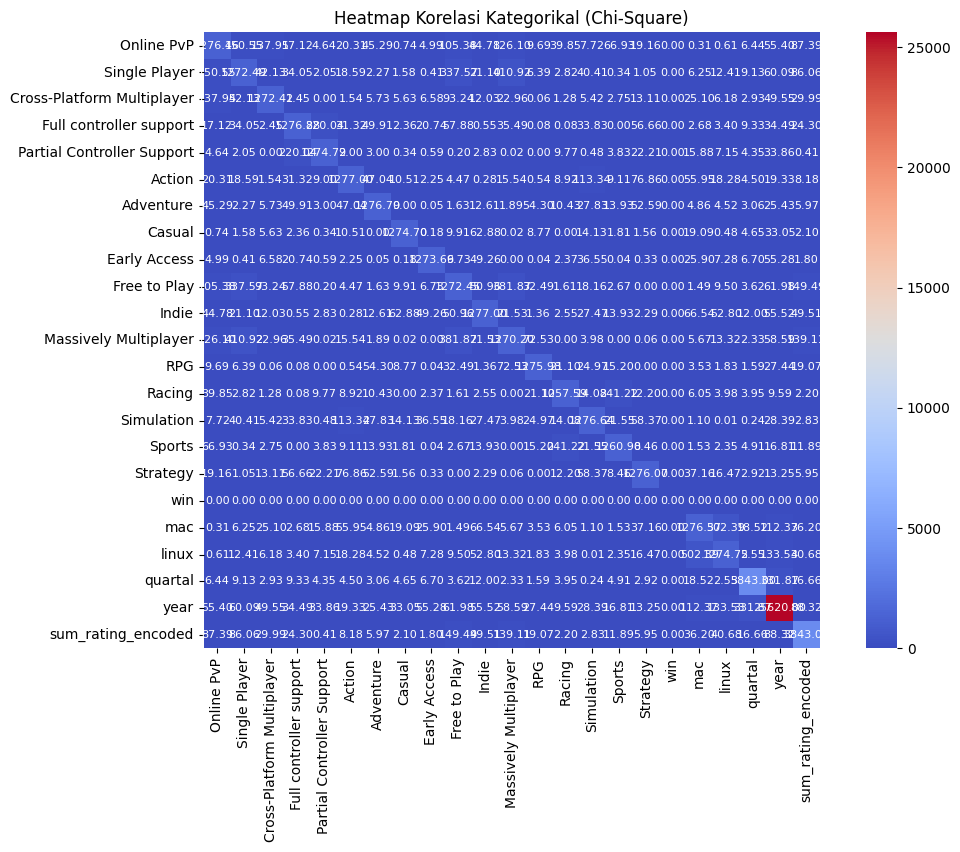

In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import chi2_contingency
import seaborn as sns
import matplotlib.pyplot as plt

# Pilih kolom yang akan digunakan
selected_columns = comb.columns[3:26]

# Menghitung matriks chi-square untuk seluruh pasangan variabel kategorikal
chi2_matrix = np.zeros((len(selected_columns), len(selected_columns)))
for i in range(len(selected_columns)):
    for j in range(len(selected_columns)):
        observed = pd.crosstab(df[selected_columns[i]], df[selected_columns[j]])
        chi2, _, _, _ = chi2_contingency(observed)
        chi2_matrix[i, j] = chi2

# Membuat heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(chi2_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True, xticklabels=selected_columns, yticklabels=selected_columns, annot_kws={"size": 8, "ha": 'center'})
plt.title('Heatmap Korelasi Kategorikal (Chi-Square)')
plt.show()

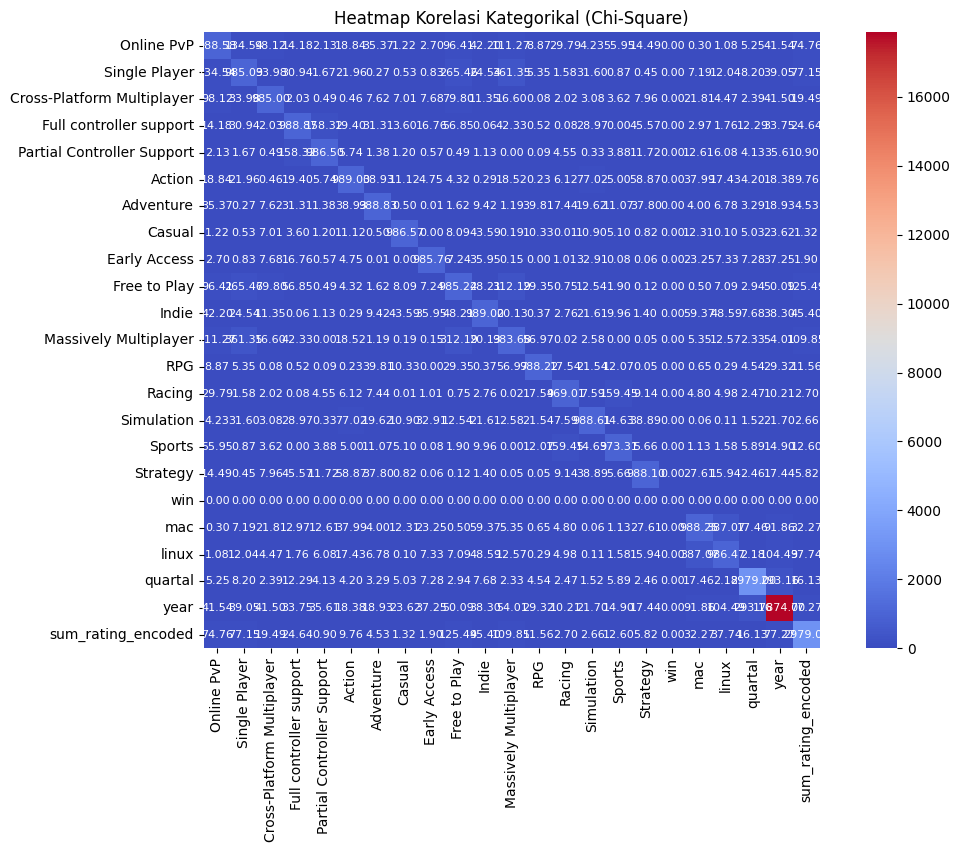

In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import chi2_contingency
import seaborn as sns
import matplotlib.pyplot as plt

# Pilih kolom yang akan digunakan
selected_columns = comb.columns[3:26]

# Menghitung matriks chi-square untuk seluruh pasangan variabel kategorikal
chi2_matrix = np.zeros((len(selected_columns), len(selected_columns)))
for i in range(len(selected_columns)):
    for j in range(len(selected_columns)):
        observed = pd.crosstab(comb[selected_columns[i]], comb[selected_columns[j]])
        chi2, _, _, _ = chi2_contingency(observed)
        chi2_matrix[i, j] = chi2

# Membuat heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(chi2_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True, xticklabels=selected_columns, yticklabels=selected_columns, annot_kws={"size": 8, "ha": 'center'})
plt.title('Heatmap Korelasi Kategorikal (Chi-Square)')
plt.show()

In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import chi2_contingency

# Pilih kolom yang akan digunakan
selected_columns = df.columns[3:26]

# Menghitung matriks chi-square untuk seluruh pasangan variabel kategorikal
chi2_matrix = np.zeros((len(selected_columns), len(selected_columns)))
for i in range(len(selected_columns)):
    for j in range(len(selected_columns)):
        observed = pd.crosstab(df[selected_columns[i]], df[selected_columns[j]])
        chi2, _, _, _ = chi2_contingency(observed)
        chi2_matrix[i, j] = chi2

# Menampilkan output angka-angka dari matriks chi-square
for i in range(len(selected_columns)):
    for j in range(len(selected_columns)):
        print(f'{selected_columns[i]} vs {selected_columns[j]}: {chi2_matrix[i, j]:.2f}')

sum_rating_encoded vs sum_rating_encoded: 3843.00
sum_rating_encoded vs Online PvP: 87.39
sum_rating_encoded vs Single Player: 86.06
sum_rating_encoded vs Cross-Platform Multiplayer: 29.99
sum_rating_encoded vs Full controller support: 24.30
sum_rating_encoded vs Partial Controller Support: 0.41
sum_rating_encoded vs Action: 8.18
sum_rating_encoded vs Adventure: 5.97
sum_rating_encoded vs Casual: 2.10
sum_rating_encoded vs Early Access: 1.80
sum_rating_encoded vs Free to Play: 149.49
sum_rating_encoded vs Indie: 49.51
sum_rating_encoded vs Massively Multiplayer: 139.11
sum_rating_encoded vs RPG: 19.07
sum_rating_encoded vs Racing: 2.20
sum_rating_encoded vs Simulation: 2.83
sum_rating_encoded vs Sports: 11.89
sum_rating_encoded vs Strategy: 5.95
sum_rating_encoded vs win: 0.00
sum_rating_encoded vs mac: 36.20
sum_rating_encoded vs linux: 40.68
sum_rating_encoded vs quartal: 16.66
sum_rating_encoded vs year: 88.32
Online PvP vs sum_rating_encoded: 87.39
Online PvP vs Online PvP: 1276.46

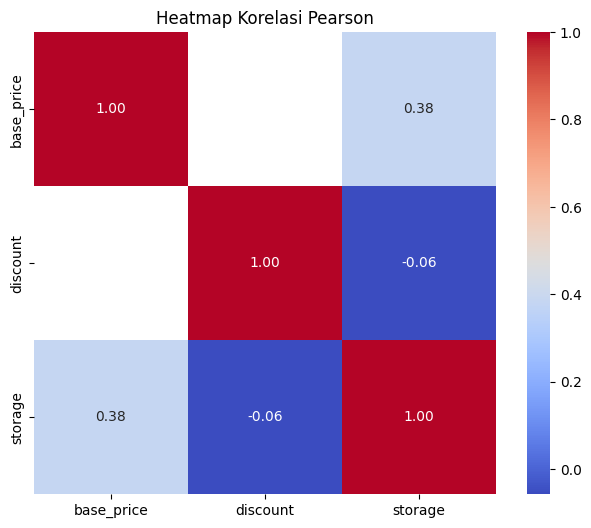

In [ ]:
import seaborn as sns

# Mengambil subset data dengan kolom 'base_price', 'discount', dan 'storage'
subset_data = df[['base_price', 'discount', 'storage']]

# Menghitung matriks korelasi Pearson
correlation = subset_data.corr(method='pearson')

# Membuat heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, cmap='coolwarm', annot=True, fmt='.2f', square=True)
plt.title('Heatmap Korelasi Pearson')
plt.show()

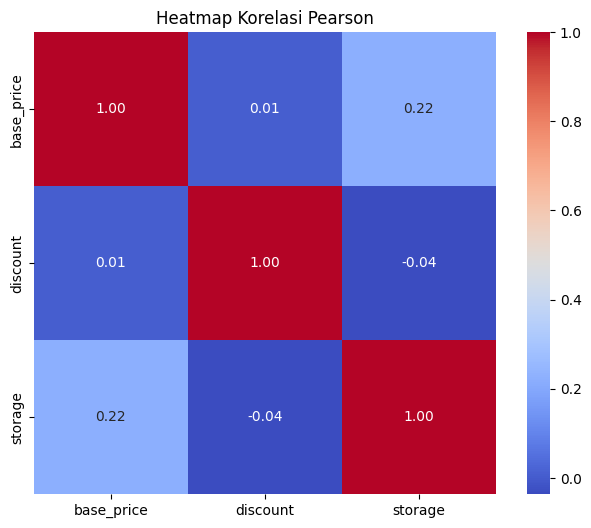

In [ ]:
# Mengambil subset data dengan kolom 'base_price', 'discount', dan 'storage'
subset_data = comb[['base_price', 'discount', 'storage']]

# Menghitung matriks korelasi Pearson
correlation = subset_data.corr(method='pearson')

# Membuat heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, cmap='coolwarm', annot=True, fmt='.2f', square=True)
plt.title('Heatmap Korelasi Pearson')
plt.show()

## Numerik dan Kategorik

In [ ]:
# Membaca data dari variabel comb
yole = comb[['sum_rating_encoded', 'base_price', 'discount', 'storage']]

# Menghitung korelasi Pearson
correlation_matrix = yole.corr()

# Menampilkan korelasi Pearson
print(correlation_matrix)

                    sum_rating_encoded  base_price  discount   storage
sum_rating_encoded            1.000000   -0.014865 -0.013942 -0.175081
base_price                   -0.014865    1.000000  0.005614  0.221505
discount                     -0.013942    0.005614  1.000000 -0.036398
storage                      -0.175081    0.221505 -0.036398  1.000000


In [ ]:
# Membaca data dari variabel comb
data = comb[['sum_rating_encoded', 'base_price', 'discount', 'storage']]

# Menghitung korelasi antara setiap nilai sum_rating_encoded dengan variabel numerik
correlations = {}
for value in range(4):
    subset = data[data['sum_rating_encoded'] == value]
    correlations[value] = subset[['base_price', 'discount', 'storage']].corr()

# Menampilkan korelasi antara setiap nilai sum_rating_encoded dengan variabel numerik
for value, correlation_matrix in correlations.items():
    print(f"\nKorelasi untuk sum_rating_encoded = {value}:")
    print(correlation_matrix)


Korelasi untuk sum_rating_encoded = 0:
            base_price  discount   storage
base_price         NaN       NaN       NaN
discount           NaN  1.000000 -0.842657
storage            NaN -0.842657  1.000000

Korelasi untuk sum_rating_encoded = 1:
            base_price  discount   storage
base_price    1.000000 -0.001419  0.177327
discount     -0.001419  1.000000 -0.029403
storage       0.177327 -0.029403  1.000000

Korelasi untuk sum_rating_encoded = 2:
            base_price  discount   storage
base_price    1.000000  0.053290  0.158332
discount      0.053290  1.000000 -0.045629
storage       0.158332 -0.045629  1.000000

Korelasi untuk sum_rating_encoded = 3:
            base_price  discount   storage
base_price    1.000000 -0.007705  0.401883
discount     -0.007705  1.000000 -0.034090
storage       0.401883 -0.034090  1.000000


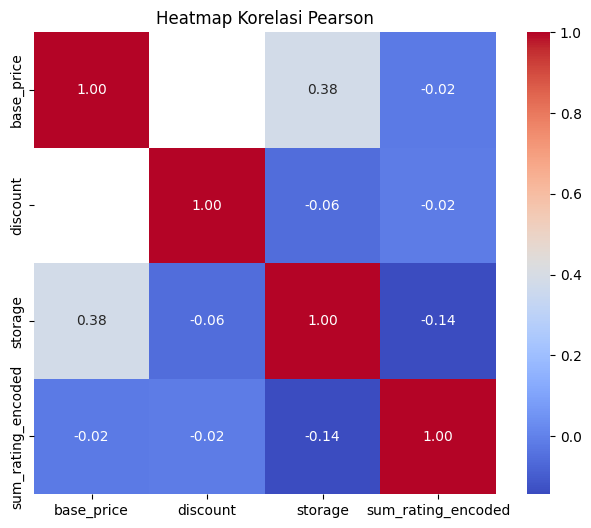

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Menggabungkan variabel numerik dan variabel dummy menjadi satu dataframe
df_corr = df[['base_price', 'discount', 'storage', 'sum_rating_encoded']]

# Menghitung korelasi Pearson
corr_matrix = df_corr.corr(method='pearson')

# Membuat heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Heatmap Korelasi Pearson')
plt.show()

In [ ]:
from scipy.stats import pointbiserialr

# Mengambil subset dari DataFrame yang hanya berisi variabel-variabel kategorikal yang sudah di-dummy-kan
categorical_vars = comb.iloc[:, 3:26]

# Menghitung koefisien korelasi phi antara setiap pasangan variabel kategorikal
correlation_matrix = categorical_vars.apply(lambda x: x.map({1: True, 0: False})).corr()

# Menampilkan matriks korelasi
print(correlation_matrix)

                            Online PvP  Single Player  \
Online PvP                    1.000000      -0.371071   
Single Player                -0.371071       1.000000   
Cross-Platform Multiplayer    0.317349      -0.188987   
Full controller support      -0.121653       0.179400   
Partial Controller Support    0.048985      -0.044654   
Action                        0.139856      -0.151551   
Adventure                    -0.190884       0.019280   
Casual                        0.037748      -0.026800   
Early Access                 -0.055031       0.032669   
Free to Play                  0.314553      -0.520998   
Indie                        -0.208270       0.160041   
Massively Multiplayer         0.337989      -0.607569   
RPG                          -0.096854      -0.076508   
Racing                        0.178418       0.046889   
Simulation                   -0.067496       0.181373   
Sports                        0.242078       0.035903   
Strategy                      0

<ipython-input-159-5d8e30fe3e84>:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = categorical_vars.apply(lambda x: x.map({1: True, 0: False})).corr()


In [ ]:
from scipy.stats import chi2_contingency

# Mengambil kolom-kolom variabel kategorikal
categorical_vars = comb.iloc[:, 3:27]

# Melakukan uji chi-square untuk setiap variabel kategorikal
for column in categorical_vars:
    cross_tab = pd.crosstab(comb['sum_rating_encoded'], comb[column])
    chi2, p_value, _, _ = chi2_contingency(cross_tab)
    print(f"Chi-square statistic for {column}: {chi2}")
    print(f"p-value for {column}: {p_value}")
    print("")

Chi-square statistic for Online PvP: 74.76039924459162
p-value for Online PvP: 4.078103896292586e-16

Chi-square statistic for Single Player: 77.15412883581877
p-value for Single Player: 1.2512290018167446e-16

Chi-square statistic for Cross-Platform Multiplayer: 19.48562845916732
p-value for Cross-Platform Multiplayer: 0.00021693417001015264

Chi-square statistic for Full controller support: 24.640547135750523
p-value for Full controller support: 1.8356835263007016e-05

Chi-square statistic for Partial Controller Support: 0.8959584518509368
p-value for Partial Controller Support: 0.8264030166348767

Chi-square statistic for Action: 9.759682352203917
p-value for Action: 0.020723363900370897

Chi-square statistic for Adventure: 4.531539875673658
p-value for Adventure: 0.20949419668880193

Chi-square statistic for Casual: 1.3247962784206446
p-value for Casual: 0.7232535455278901

Chi-square statistic for Early Access: 1.8994862284156546
p-value for Early Access: 0.5935284490333848

Chi-s

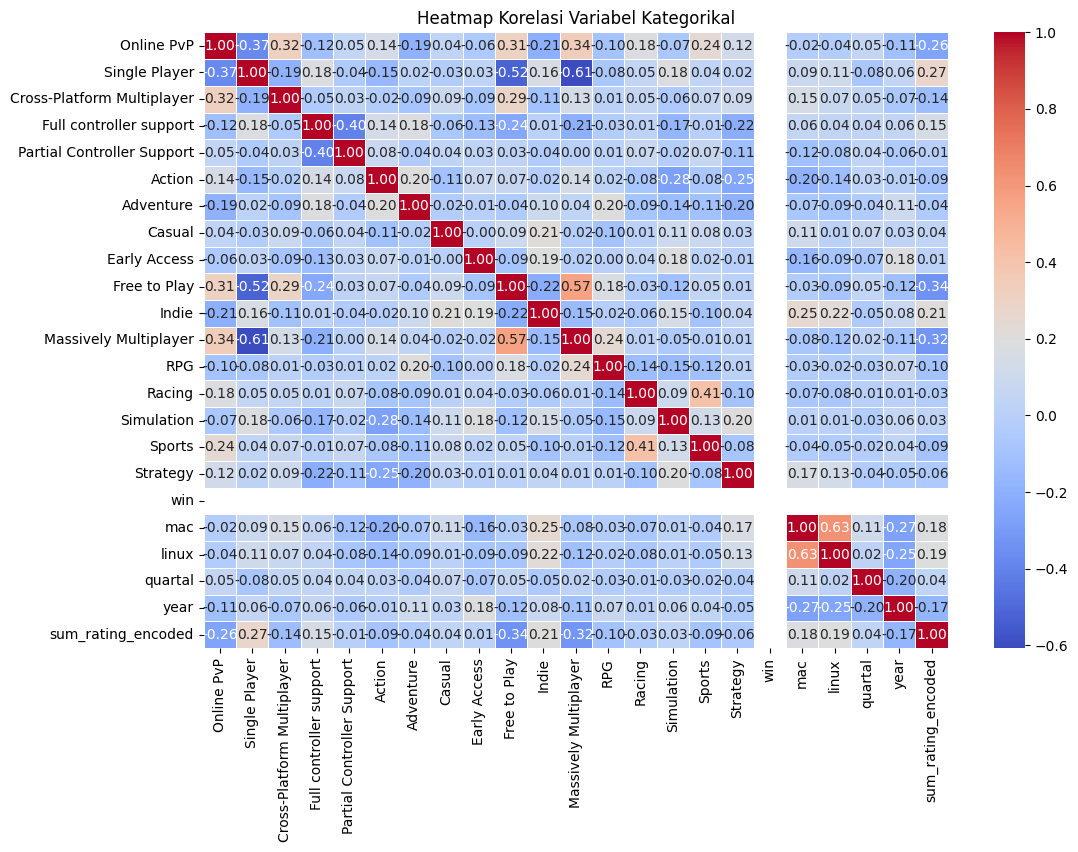

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Mengambil kolom-kolom variabel kategorikal
categorical_vars = comb.iloc[:, 3:27]

# Menghitung matriks korelasi menggunakan metode Cramer's V
corr_matrix = categorical_vars.corr(method='spearman')

# Membuat heatmap dari matriks korelasi
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Heatmap Korelasi Variabel Kategorikal')
plt.show()

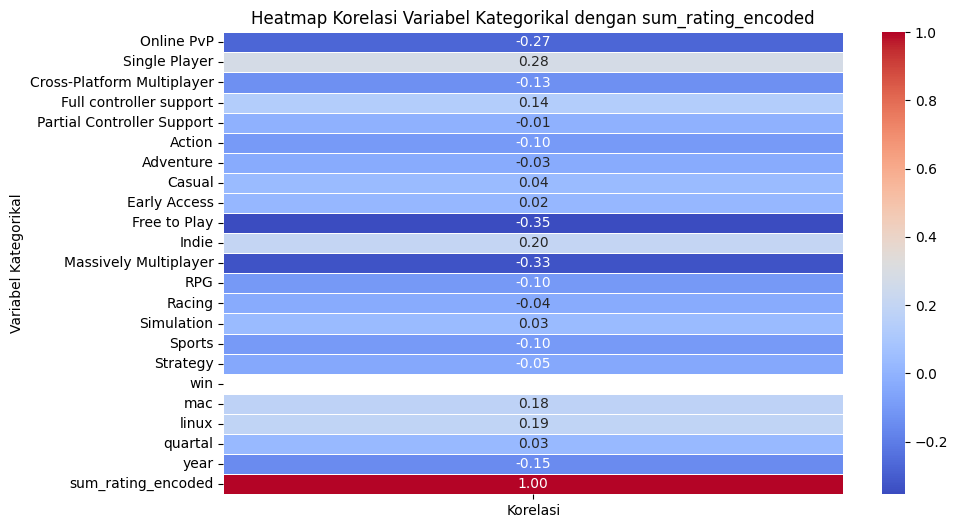

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Mengambil kolom variabel kategorikal sum_rating_encoded
sum_rating_encoded = comb['sum_rating_encoded']

# Menghitung matriks korelasi antara sum_rating_encoded dengan variabel kategorikal lainnya
corr_matrix = categorical_vars.corrwith(sum_rating_encoded)

# Membuat dataframe untuk heatmap
heatmap_data = pd.DataFrame(corr_matrix, columns=['Korelasi'])
heatmap_data.index.name = 'Variabel Kategorikal'

# Membuat heatmap dari matriks korelasi
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Heatmap Korelasi Variabel Kategorikal dengan sum_rating_encoded')
plt.show()

In [ ]:
# Mengambil kolom variabel kategorikal sum_rating_encoded
sum_rating_encoded = comb['sum_rating_encoded']

# Menghitung matriks korelasi antara sum_rating_encoded dengan variabel kategorikal lainnya
corr_matrix = categorical_vars.corrwith(sum_rating_encoded)

# Membuat dataframe untuk korelasi
correlation_data = pd.DataFrame(corr_matrix, columns=['Korelasi'])
correlation_data.index.name = 'Variabel Kategorikal'

# Menampilkan tabel korelasi
print(correlation_data)

                            Korelasi
Variabel Kategorikal                
Online PvP                 -0.272213
Single Player               0.277943
Cross-Platform Multiplayer -0.132969
Full controller support     0.137468
Partial Controller Support -0.005781
Action                     -0.097116
Adventure                  -0.032115
Casual                      0.035039
Early Access                0.019276
Free to Play               -0.354510
Indie                       0.204584
Massively Multiplayer      -0.331514
RPG                        -0.100693
Racing                     -0.035504
Simulation                  0.033452
Sports                     -0.096091
Strategy                   -0.045212
win                              NaN
mac                         0.179204
linux                       0.189945
quartal                     0.031221
year                       -0.152114
sum_rating_encoded          1.000000


## Proporsi Genre

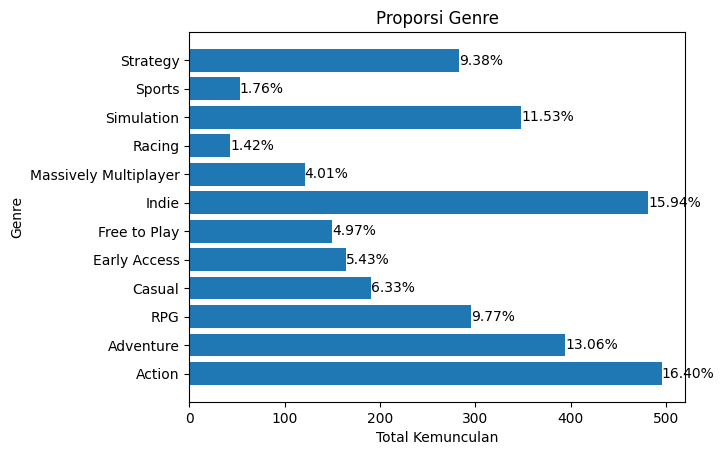

In [ ]:
# Menghitung total kemunculan setiap genre
totals = [sum(comb.Action), sum(comb.Adventure), sum(comb.RPG), sum(comb.Casual), sum(comb['Early Access']), sum(comb['Free to Play']), sum(comb.Indie), sum(comb['Massively Multiplayer']), sum(comb.Racing), sum(comb.Simulation), sum(comb.Sports), sum(comb.Strategy)]
genre = ['Action', 'Adventure', 'RPG', 'Casual', 'Early Access', 'Free to Play', 'Indie', 'Massively Multiplayer', 'Racing', 'Simulation', 'Sports', 'Strategy']
# Menghitung total keseluruhan
total_all = sum(totals)
# Menghitung persentase dan membuat label persentase
percentages1 = [(total / total_all) * 100 for total in totals]
labels = [f'{percentages1[i]:.2f}%' for i in range(len(genre))]

# Membuat bar chart horizontal
fig, ax = plt.subplots()
bars = ax.barh(genre, totals)
plt.xlabel('Total Kemunculan')
plt.ylabel('Genre')
plt.title('Proporsi Genre')

# Menampilkan label persentase di samping bar
for i, bar in enumerate(bars):
    width = bar.get_width()
    ax.text(width, bar.get_y() + bar.get_height() / 2, labels[i],
            ha='left', va='center')

plt.show()

## Proporsi Fitur Game

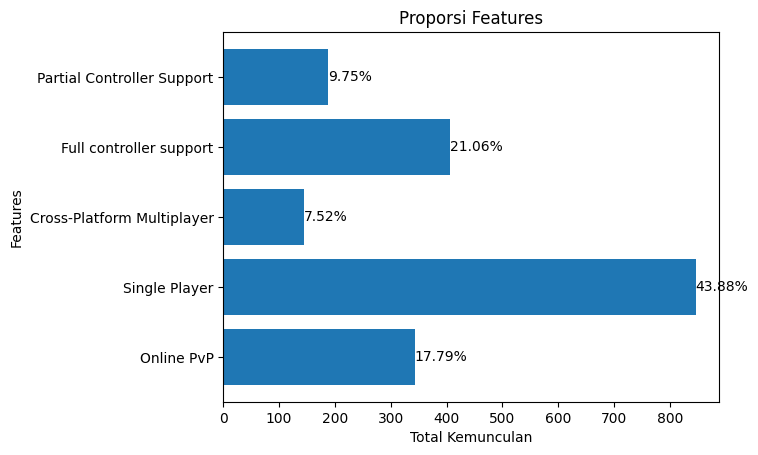

In [ ]:
# Menghitung total kemunculan setiap genre
totals1 = [sum(comb['Online PvP']), sum(comb['Single Player']), sum(comb['Cross-Platform Multiplayer']), sum(comb['Full controller support']), sum(comb['Partial Controller Support'])]
features = ['Online PvP', 'Single Player', 'Cross-Platform Multiplayer', 'Full controller support', 'Partial Controller Support']
# Menghitung total keseluruhan
total_all = sum(totals1)
# Menghitung persentase dan membuat label persentase
percentages = [(total / total_all) * 100 for total in totals1]
labels = [f'{percentages[i]:.2f}%' for i in range(len(features))]

# Membuat bar chart horizontal
fig, ax = plt.subplots()
bars = ax.barh(features, totals1)
plt.xlabel('Total Kemunculan')
plt.ylabel('Features')
plt.title('Proporsi Features')

# Menampilkan label persentase di samping bar
for i, bar in enumerate(bars):
    width = bar.get_width()
    ax.text(width, bar.get_y() + bar.get_height() / 2, labels[i],
            ha='left', va='center')

plt.show()

## Proporsi OS

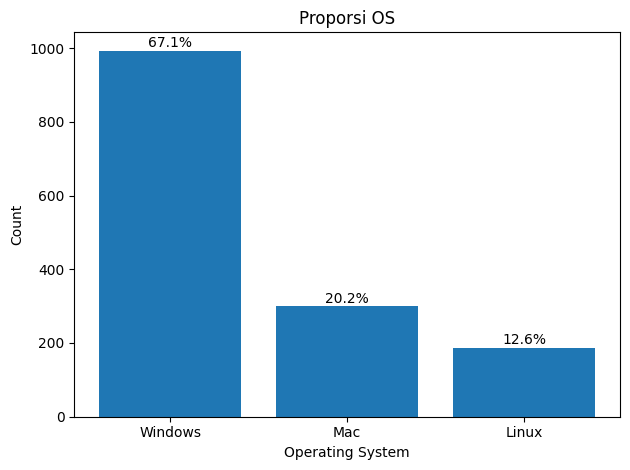

In [ ]:
#Bar Chart operating system
labels = ['Windows', 'Mac', 'Linux']
values = [sum(comb.win), sum(comb.mac), sum(comb.linux)]

plt.bar(labels, values)
plt.xlabel('Operating System')
plt.ylabel('Count')
plt.title('Proporsi OS')

# Menambahkan persentase di atas setiap batang
total = sum(values)
for i, value in enumerate(values):
    percentage = value / total * 100
    plt.text(i, value + 1, f'{percentage:.1f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()

## Proporsi Release Game per Kuartal per Tahun

<ipython-input-111-800d25330ee3>:12: FutureWarning: This dataframe has a column name that matches the 'value_name' column name of the resulting Dataframe. In the future this will raise an error, please set the 'value_name' parameter of DataFrame.melt to a unique name.
  df_melted = df_jumlah_game.melt(id_vars=['quartal', 'year'], value_vars='jumlah_game', var_name='variabel', value_name='jumlah_game')


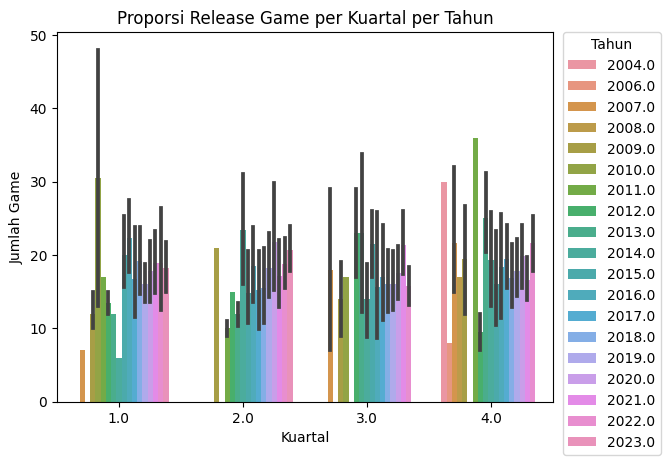

In [ ]:
# Membuat data dummy untuk jumlah game
jumlah_game = [len(title) for title in df.title]

# Mengubah data dummy menjadi DataFrame
df_jumlah_game = pd.DataFrame(jumlah_game, columns=['jumlah_game'])

# Menggabungkan data dummy dengan kolom quartal dan tahun
df_jumlah_game['quartal'] = comb.quartal
df_jumlah_game['year'] = comb.year

# Melt DataFrame untuk mengubahnya menjadi format yang cocok untuk seaborn
df_melted = df_jumlah_game.melt(id_vars=['quartal', 'year'], value_vars='jumlah_game', var_name='variabel', value_name='jumlah_game')

# Membuat grouped bar chart dengan seaborn
sns.barplot(x='quartal', y='jumlah_game', hue='year', data=df_melted)

# Memberikan judul dan label sumbu
plt.title('Proporsi Release Game per Kuartal per Tahun')
plt.xlabel('Kuartal')
plt.ylabel('Jumlah Game')

# Menampilkan legend dengan tata letak menyamping
plt.legend(title='Tahun', bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0.)

plt.show()

# MODELING

## Regresi Logistik

In [ ]:
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import accuracy_score

# # Inisialisasi model regresi logistik
# logreg_model = LogisticRegression()

# # Melatih model dengan data train
# logreg_model.fit(X_train, y_train)

# # Melakukan prediksi terhadap data test
# y_pred = logreg_model.predict(X_test)

In [ ]:
# from sklearn.metrics import classification_report
# from sklearn import metrics

# print('Test F1 score: ', round(metrics.f1_score(y_test, y_pred,average='micro'),4))
# print(classification_report(y_test, y_pred))

## Decision Tree

In [ ]:
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.metrics import classification_report

# # Inisialisasi model Decision Tree
# dt_model = DecisionTreeClassifier(random_state=42)

# # Melatih model dengan data train yang telah di-preprocessed
# dt_model.fit(X_train_over, y_train_over)

# # Melakukan prediksi terhadap data test
# y_pred = dt_model.predict(X_test)

In [ ]:
# from sklearn.metrics import classification_report
# from sklearn import metrics

# print('Test F1 score: ', round(metrics.f1_score(y_test, y_pred,average='micro'),4))
# print(classification_report(y_test, y_pred))

## Random Forest

In [ ]:
# from sklearn.ensemble import RandomForestClassifier

# # Buat objek RandomForestClassifier dengan parameter terbaik
# rfc = RandomForestClassifier(n_estimators=3000, random_state=42,
#                             min_samples_split=3,
#                             min_samples_leaf=1,
#                             max_features='sqrt',
#                             max_depth=94,verbose=1)

# # Latih model dengan data latih
# rfc.fit(X_train_over, y_train_over)

# # Lakukan prediksi pada data uji
# y_pred = rfc.predict(X_test)

In [ ]:
# from sklearn.metrics import classification_report
# from sklearn import metrics

# print('Test F1 score: ', round(metrics.f1_score(y_test, y_pred,average='micro'),4))
# print(classification_report(y_test, y_pred))

## Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report

# Inisialisasi model Gradient Boosting
gb_model = GradientBoostingClassifier(n_estimators = 300, min_samples_split= 6,
                                      min_samples_leaf = 1, max_depth = 8,
                                      learning_rate = 0.01, random_state=42)

# Melatih model dengan data train yang telah di-preprocessed
gb_model.fit(X_train, y_train)

# Melakukan prediksi terhadap data test
y_pred = gb_model.predict(X_test)

In [ ]:
# from sklearn.ensemble import GradientBoostingClassifier
# from sklearn.model_selection import RandomizedSearchCV
# from sklearn.metrics import classification_report

# # Inisialisasi model Gradient Boosting
# gb_model = GradientBoostingClassifier(random_state=42)

# # Tentukan hyperparameter yang akan dioptimasi dan range nilai yang akan diuji
# param_grid = {
#     'n_estimators': [100, 200, 300, 500],
#     'learning_rate': [0.1, 0.05, 0.01, 0.02],
#     'max_depth': [3, 4, 5, 8],
#     'min_samples_split': [2, 4, 6],
#     'min_samples_leaf': [1, 2, 3]
# }

# # Inisialisasi objek RandomizedSearchCV
# random_search = RandomizedSearchCV(gb_model, param_distributions=param_grid, n_iter=10, cv=5, random_state=42)

# # Melakukan pencarian hyperparameter terbaik menggunakan data train
# random_search.fit(X_train_over, y_train_over)

# # Mendapatkan model dengan hyperparameter terbaik
# best_model = random_search.best_estimator_

# # Melakukan prediksi terhadap data test
# y_pred = best_model.predict(X_test)

In [ ]:
# print(random_search.best_params_)

In [ ]:
from sklearn.metrics import classification_report
from sklearn import metrics

print('Test F1 score: ', metrics.f1_score(y_test, y_pred,average='micro'))
print(classification_report(y_test, y_pred))

In [ ]:
from sklearn.metrics import confusion_matrix

# Menghitung confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

## KNN

In [ ]:
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.metrics import classification_report

# # Inisialisasi model KNN dengan nilai K=5
# knn_model = KNeighborsClassifier(n_neighbors=5)

# # Melatih model dengan data train yang telah di-preprocessed
# knn_model.fit(X_train, y_train)

# # Melakukan prediksi terhadap data test
# y_pred = knn_model.predict(X_test)

In [ ]:
# from sklearn.metrics import classification_report
# from sklearn import metrics

# print('Test F1 score: ', round(metrics.f1_score(y_test, y_pred,average='micro'),4))
# print(classification_report(y_test, y_pred))

## CatBoost

In [ ]:
# !pip install catboost

In [ ]:
# from catboost import CatBoostClassifier
# from sklearn.metrics import classification_report

# # Inisialisasi model CatBoost
# catboost_model = CatBoostClassifier(iterations=100, random_state=42)

# # Melatih model dengan data train yang telah di-preprocessed
# catboost_model.fit(X_train_over, y_train_over)

# # Melakukan prediksi terhadap data test
# y_pred = catboost_model.predict(X_test)

In [ ]:
# from sklearn.metrics import classification_report
# from sklearn import metrics

# print('Test F1 score: ', round(metrics.f1_score(y_test, y_pred,average='micro'),4))
# print(classification_report(y_test, y_pred))

## XGBoost

In [ ]:
# import xgboost as xgb
# from sklearn.metrics import classification_report

# # Inisialisasi model XGBoost
# xgboost_model = xgb.XGBClassifier(n_estimators=100, random_state=42)

# # Melatih model dengan data train yang telah di-preprocessed
# xgboost_model.fit(X_train, y_train)

# # Melakukan prediksi terhadap data test
# y_pred = xgboost_model.predict(X_test)

In [ ]:
# from sklearn.metrics import classification_report
# from sklearn import metrics

# print('Test F1 score: ', round(metrics.f1_score(y_test, y_pred,average='micro'),4))
# print(classification_report(y_test, y_pred))

## Naive Bayes (GaussianNB)

In [ ]:
# from sklearn.naive_bayes import GaussianNB
# from sklearn.metrics import classification_report

# # Inisialisasi model Naive Bayes
# naive_bayes_model = GaussianNB()

# # Melatih model dengan data train yang telah di-preprocessed
# naive_bayes_model.fit(X_train_over, y_train_over)

# # Melakukan prediksi terhadap data test
# y_pred = naive_bayes_model.predict(X_test)

In [ ]:
# from sklearn.metrics import classification_report
# from sklearn import metrics

# print('Test F1 score: ', round(metrics.f1_score(y_test, y_pred,average='micro'),4))
# print(classification_report(y_test, y_pred))